In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/vaksakalli/datasets/master/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


# Soal 1: Scatter Plot

Buatlah scatterplot menggunakan Seaborn dari data df di atas, variasikan menggunakan palette yang telah disediakan sehingga didapatkan output sesuai expected.

In [ ]:
# menyesuaikan urutan clarity
hue_order = df["clarity"].unique().tolist()
hue_order.insert(0, hue_order.pop(hue_order.index("I1")))
hue_order.insert(3, hue_order.pop(hue_order.index("VS2")))
print(hue_order)

['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']


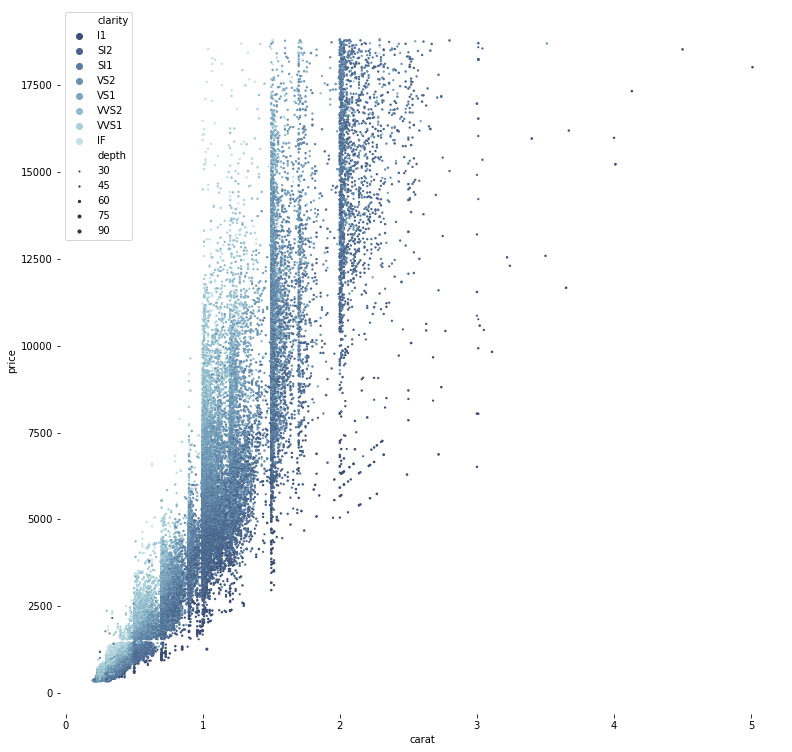

In [ ]:
fig, ax = plt.subplots(figsize=(13, 13))
palette="ch:r=-.2,d=.3_r"

sns.scatterplot(data=df, x="carat", y="price", 
                hue="clarity", hue_order=hue_order, 
                size="depth", sizes=(1, 10), 
                legend="brief", palette=palette, linewidth=0)

sns.despine(top=True, right=True, left=True, bottom=True)
plt.draw()

Expected Output:

![alt text](https://drive.google.com/uc?id=1OyzNnrnkJ7TL8DIyh_2O97WuzesyLL7W)

# Soal 2: Facet Grid

Gunakan fungsi hexbin berikut untuk diterapkan pada mapping dari facetgridnya sehingga dihasilkan output sesuai expected.

```
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
```


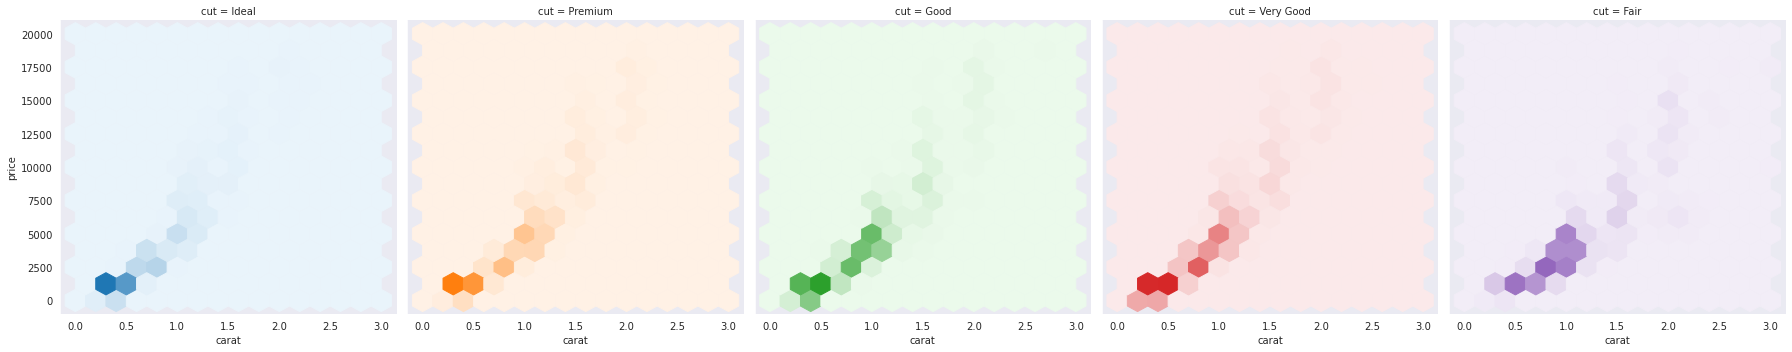

In [ ]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(df, hue="cut", col="cut", height=5)
g.map(hexbin, "carat", "price", extent=[0, 3, 0, 20000]);

Expected Output:

![alt text](https://drive.google.com/uc?id=1ZG6Uu0R_8mPAjpwublowrdUM6Hd1OXkI)

# Soal 3: Pair Plot

Ambil 300 data secara acak dari df, kemudian buat pair plotnya dari 300 data tersebut untuk kolom carat, depth, table, dan price sehingga dihasilkan output sesuai expected.

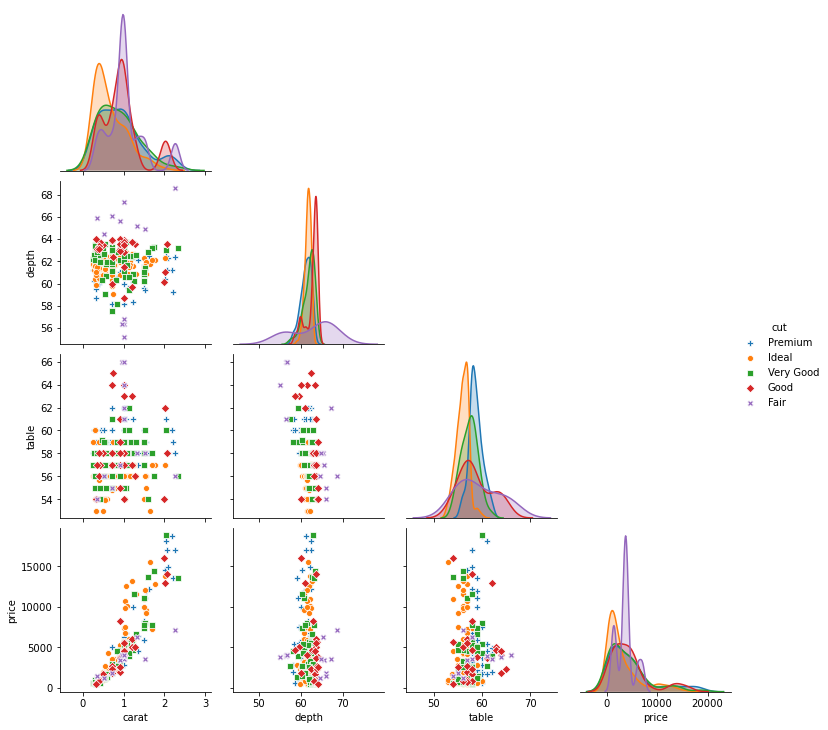

In [ ]:
df = df.sample(n=300, random_state=123)

sns.pairplot(df, vars=["carat", "depth", "table", "price"], hue="cut", markers=["P", "o", "s", "D", "X"], corner=True)
plt.draw()

Expected Output:

![alt text](https://drive.google.com/uc?id=1N3guRLAn5sIhfzzKFdvf1cZpmtEc-cw9)

# Soal 4: Joint Plot

Gunakan data yang sama dengan soal 3 untuk menghasilkan dua visualisasi joint plot antara carat dan price nya sesuai expected output.

C:\Users\Yoga\AppData\Roaming\Python\Python38\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


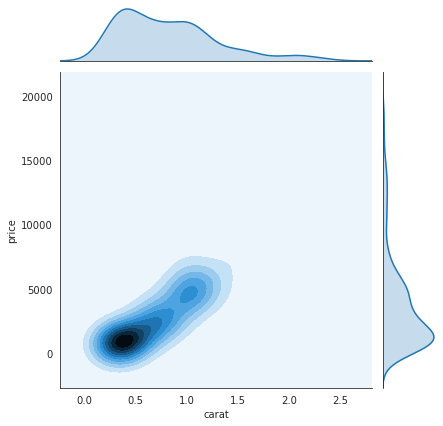

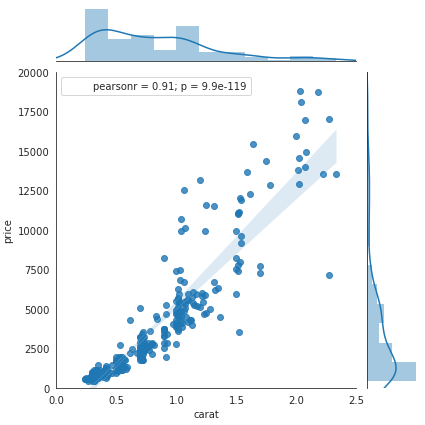

In [ ]:
from scipy.stats import pearsonr

with sns.axes_style("white"):
    sns.jointplot(data=df, x="carat", y="price", kind="kde")
    sns.jointplot(data=df, x="carat", y="price", kind="reg", 
                  stat_func=pearsonr, xlim=(0, 2.5), ylim=(0, 20000), 
                  marginal_kws=dict(hist_kws=dict(linewidth=0)))

Expected Output 1:

![alt text](https://drive.google.com/uc?id=1xX5Jq38-rr_oFD-eDRbBYCBA24Nmw2C5)

Expected Output 2:

![alt text](https://drive.google.com/uc?id=1QXY89CXRe1BzU0k7OBrr2fTn8WwIhWHo)